# Risk  Analysis

In [1]:
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

     ---------------------------------------- 7.6/7.6 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 87.0/87.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 9.0/9.0 MB 9.1 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.9 MB/s eta 0:00:00
  Running setup.py install for matplotlib-venn: started
  Running setup.py install for matplotlib-venn: finished with status 'done'
  Running setup.py install for bioinfokit: started
  Running setup.py install for bioinfokit: finished with status 'done'


  DEPRECATION: matplotlib-venn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: bioinfokit is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [4]:
df = pd.read_csv("risk.csv")
df.head()

,Recreational,Health,Career,Financial,Safety,Social
0,3,2,1,2,2,4
1,1,1,1,1,1,1
2,2,2,1,1,2,3
3,1,1,1,1,1,1
4,5,4,1,3,5,5


In [5]:
df.shape

(563, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Recreational  563 non-null    int64
 1   Health        563 non-null    int64
 2   Career        563 non-null    int64
 3   Financial     563 non-null    int64
 4   Safety        563 non-null    int64
 5   Social        563 non-null    int64
dtypes: int64(6)
memory usage: 26.5 KB


In [7]:
df['Safety'].value_counts()

2    285
1    106
3    101
4     58
5     13
Name: Safety, dtype: int64

In [8]:
df['Health'].value_counts()

2    206
1    136
3    116
4     72
5     33
Name: Health, dtype: int64

In [9]:
df['Recreational'].value_counts()

2    219
1    163
3    111
4     51
5     19
Name: Recreational, dtype: int64

In [10]:
df['Social'].value_counts()

1    208
2    205
3     97
4     38
5     15
Name: Social, dtype: int64

              Recreational    Health    Career  Financial    Safety    Social
Recreational      1.000000  0.270561  0.395146   0.287259  0.374828  0.442811
Health            0.270561  1.000000  0.282476   0.369258  0.396719  0.326059
Career            0.395146  0.282476  1.000000   0.396095  0.315767  0.438942
Financial         0.287259  0.369258  0.396095   1.000000  0.421052  0.348580
Safety            0.374828  0.396719  0.315767   0.421052  1.000000  0.319084
Social            0.442811  0.326059  0.438942   0.348580  0.319084  1.000000


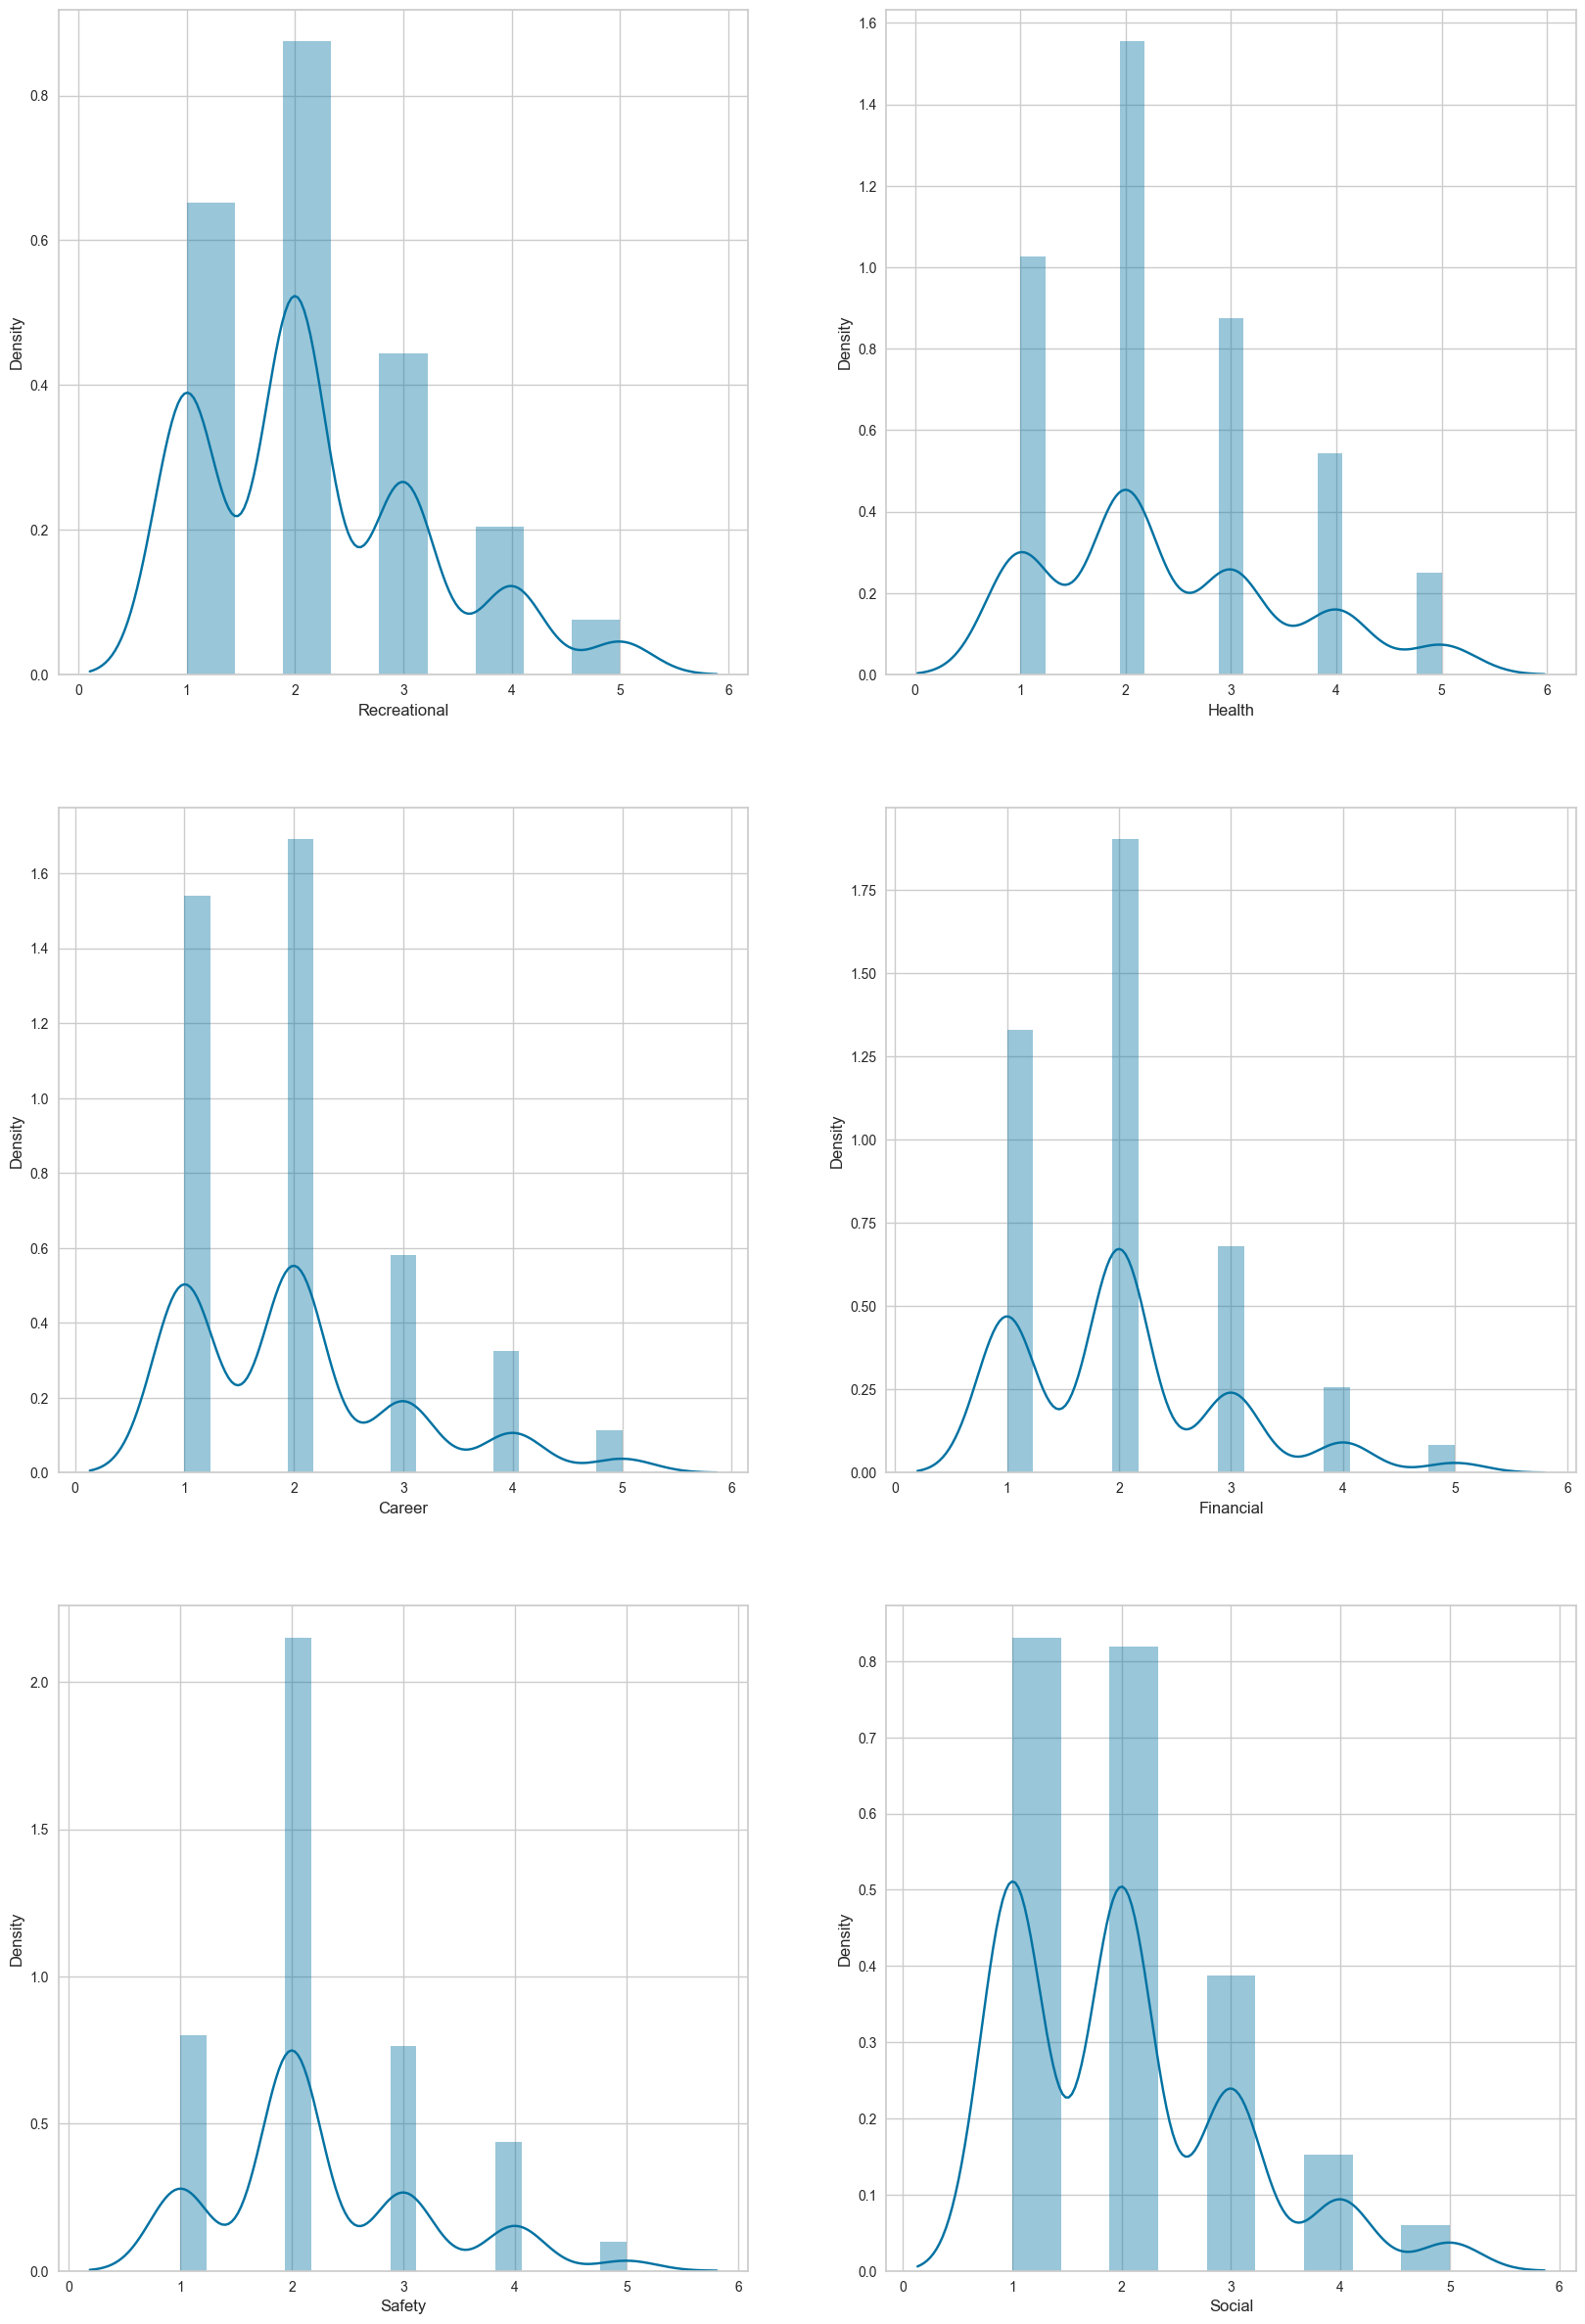

In [11]:
def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())

# applying the function on the dataset
EDA(df, (20, 30))

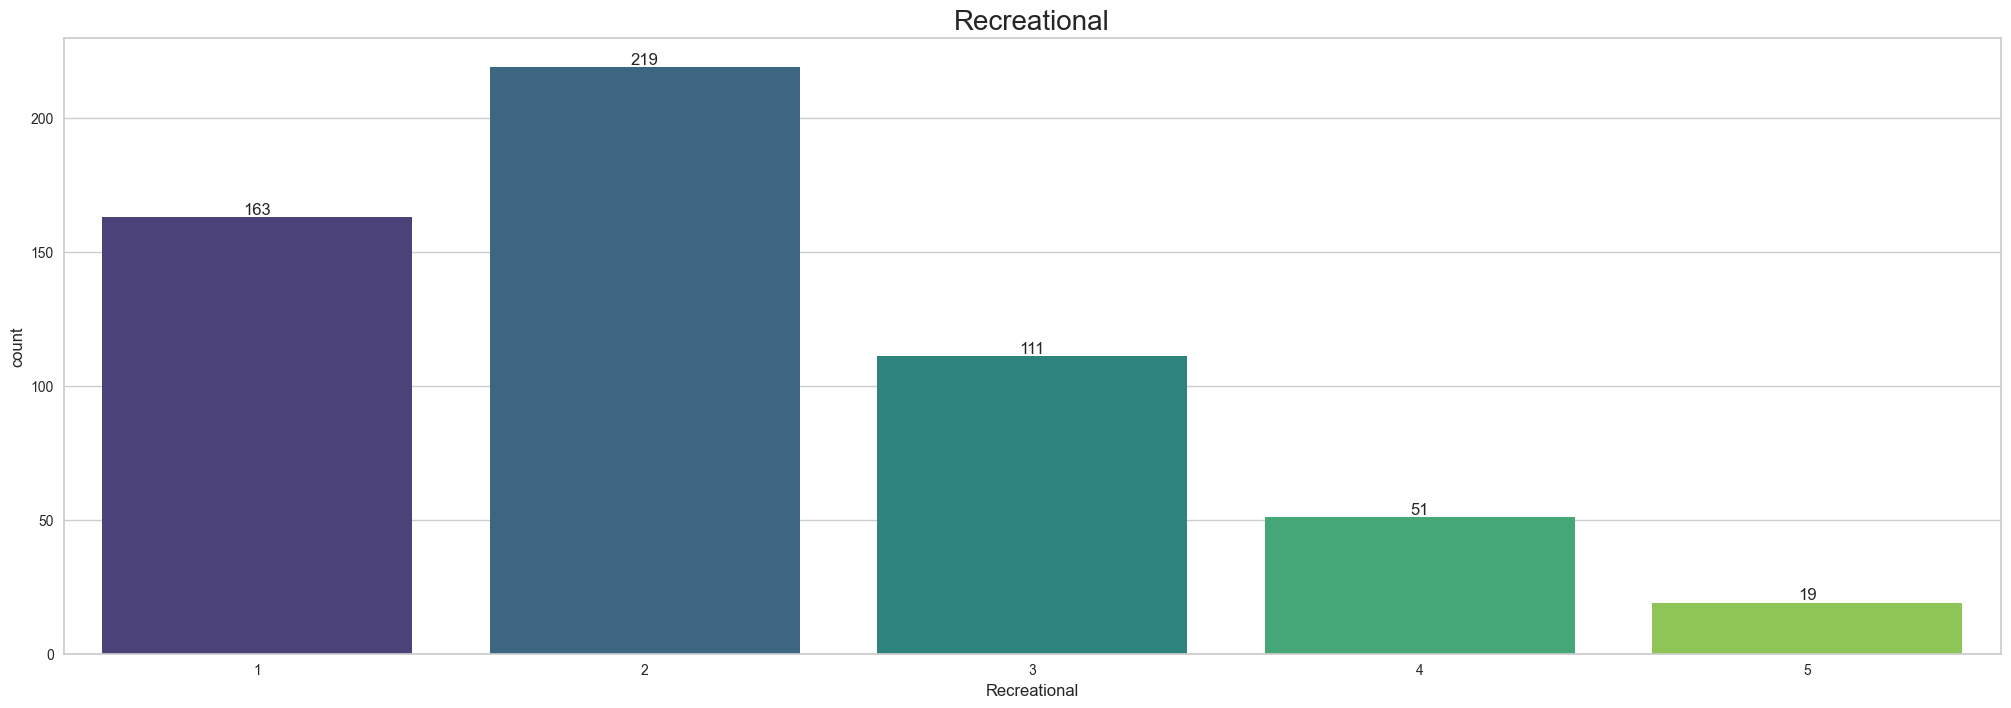

In [16]:
# Recreational between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Recreational'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Recreational', fontsize = 20)
plt.show()

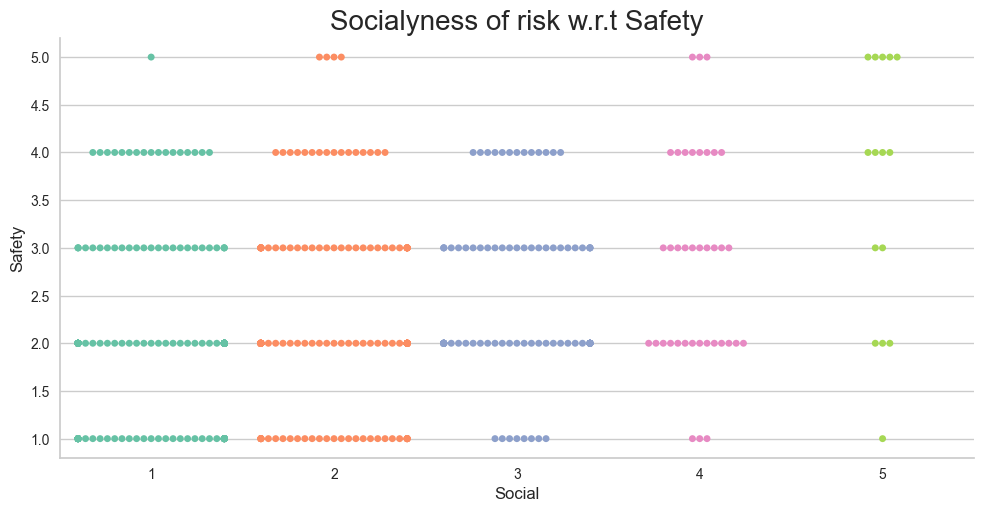

In [19]:


# plotting the results
sns.catplot(data=df, x="Social", y="Safety", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Socialyness of risk w.r.t Safety', fontsize=20)
plt.show()

In [20]:
df_new = df.drop(labels=['Social','Safety',], axis=1) 

In [21]:
df_new.head()

,Recreational,Health,Career,Financial
0,3,2,1,2
1,1,1,1,1
2,2,2,1,1
3,1,1,1,1
4,5,4,1,3


In [24]:
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,Recreational,Health,Career,Financial
0,2,1,0,1
1,0,0,0,0
2,1,1,0,0
3,0,0,0,0
4,4,3,0,2


In [27]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=4)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4
0,-0.325285,-0.339103,-0.615627,1.038102
1,-2.195843,-0.121749,0.224381,-0.060534
2,-1.332169,-0.118924,-0.716864,0.064626
3,-2.195843,-0.121749,0.224381,-0.060534
4,1.952285,0.006914,-1.912138,1.890655


In [28]:
pca.explained_variance_ratio_

array([0.50087262, 0.19564566, 0.16607433, 0.1374074 ])

In [29]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4
feature,,,,
Recreational,0.482558,-0.592334,-0.512231,0.392296
Health,0.469353,0.649660,-0.526423,-0.283775
Career,0.526931,-0.352238,0.393934,-0.665649
Financial,0.518835,0.320952,0.552552,0.567879


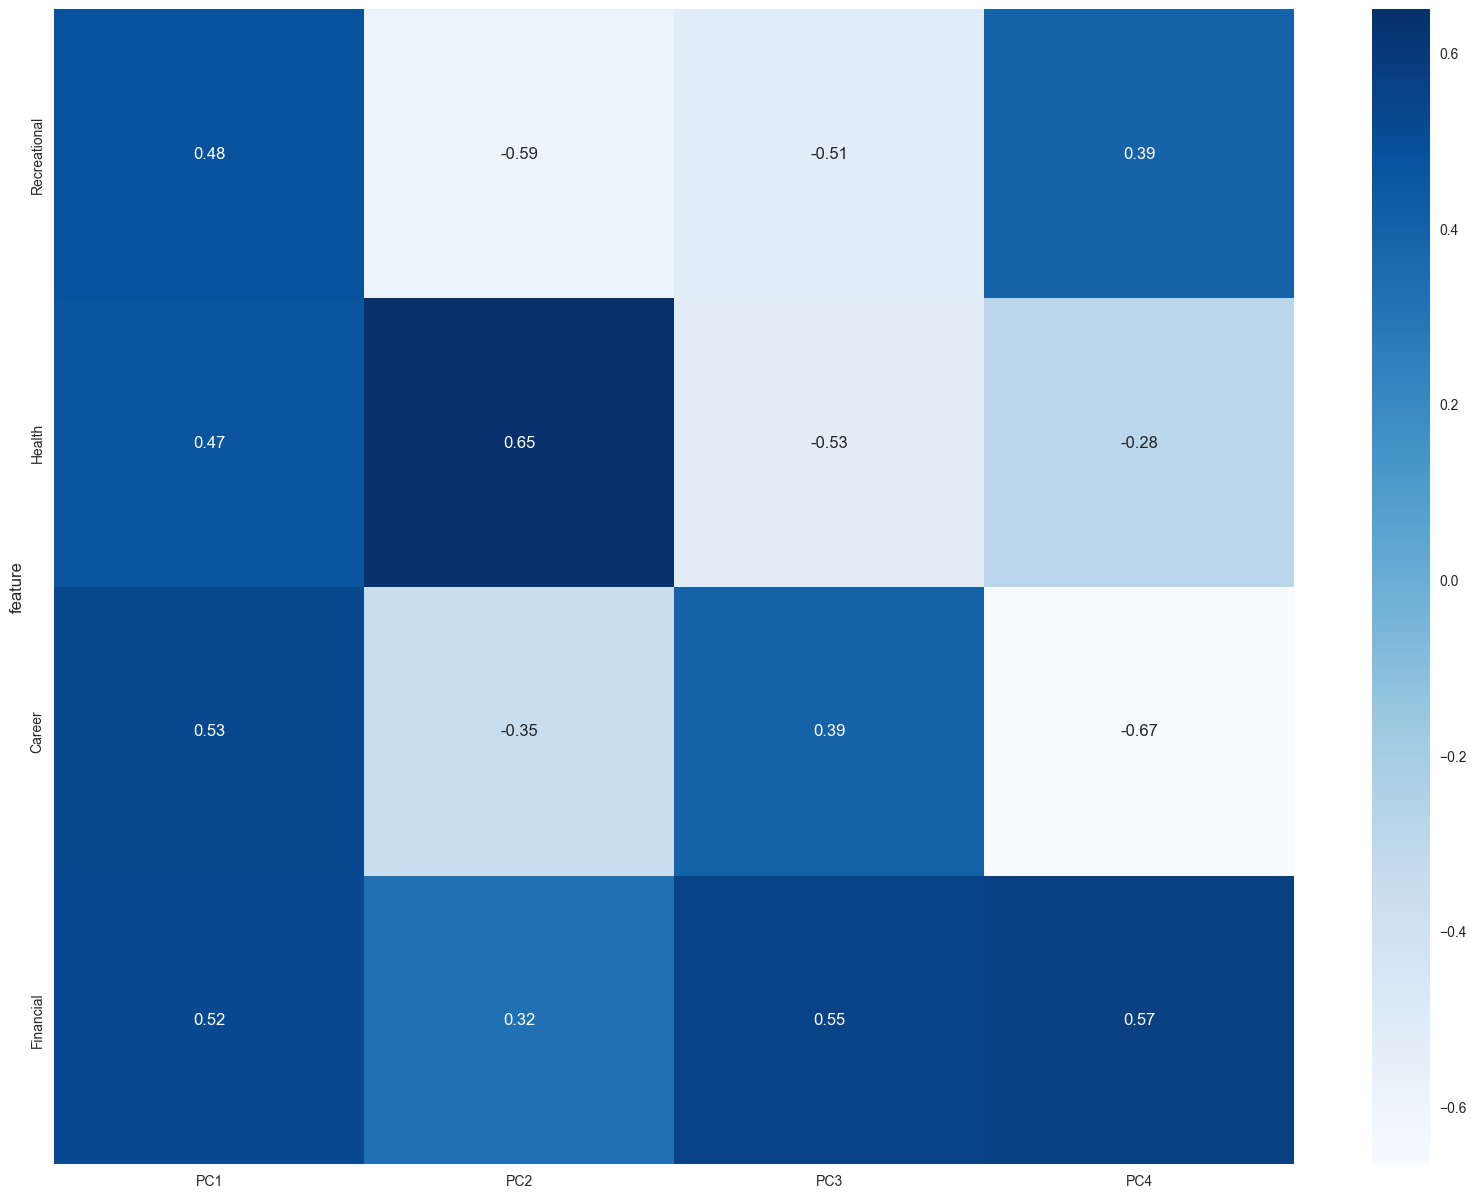

In [35]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.show()

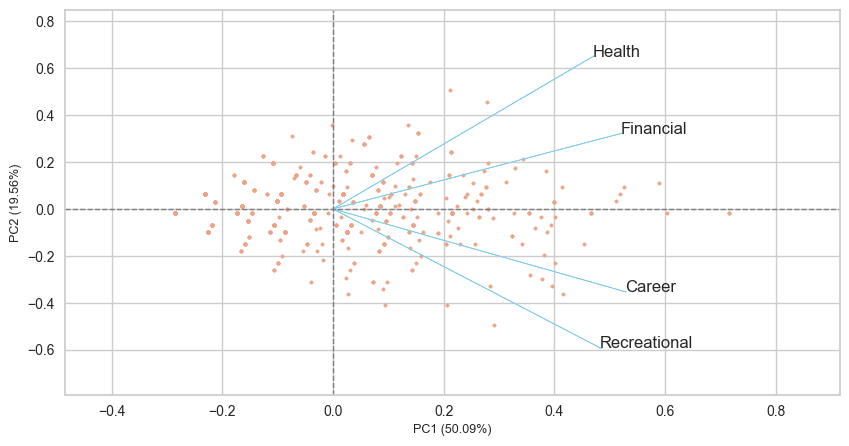

In [36]:
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

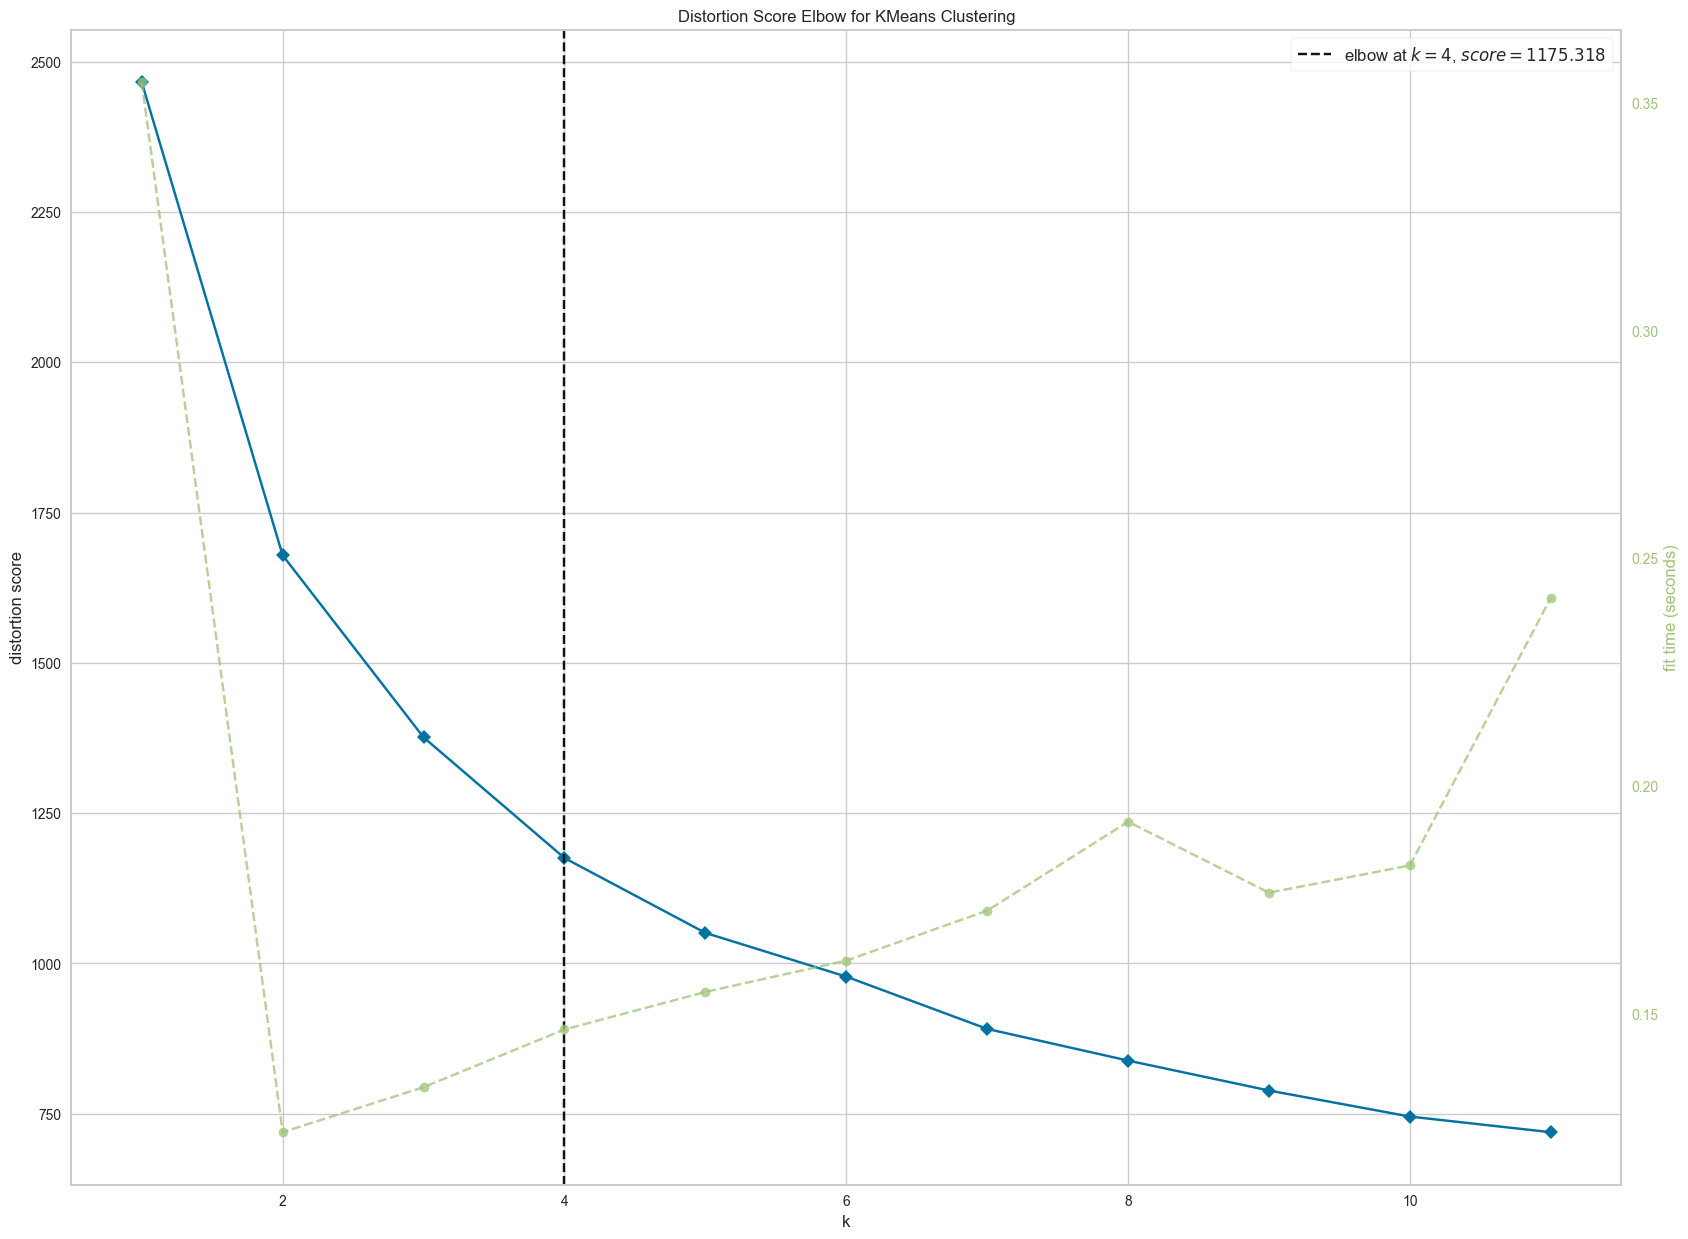

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [1 2 2 2 3 3 2 3 2 0 2 3 1 3 1 2 0 2 2 0 2 3 2 0 2 3 1 1 0 2 0 1 1 2 1 0 0
 2 0 2 1 0 1 3 3 2 0 2 2 3 1 2 1 2 3 0 1 1 3 2 1 2 0 2 1 2 3 3 1 1 2 0 3 0
 0 0 0 2 0 2 2 3 1 0 1 0 0 2 2 0 1 1 1 2 0 1 2 0 1 2 2 0 0 0 1 1 3 0 0 2 1
 1 2 1 0 2 0 0 1 1 3 2 2 1 1 0 3 2 1 1 0 3 2 1 2 3 1 2 2 0 1 0 2 3 2 1 0 2
 3 1 2 0 2 3 1 2 3 1 2 1 1 1 1 2 0 2 2 3 0 1 2 1 3 3 2 3 3 3 0 1 3 0 0 1 2
 3 2 1 1 2 1 2 1 3 2 2 2 0 1 2 0 1 2 2 1 3 2 3 1 3 1 1 2 1 0 2 0 2 2 2 0 1
 2 0 3 1 0 1 1 1 1 1 3 0 1 1 1 1 0 1 2 0 3 1 2 0 2 1 1 1 2 1 3 3 2 3 2 2 1
 2 3 2 1 2 2 1 3 2 2 2 1 0 2 1 2 2 0 1 1 0 2 2 2 2 1 1 0 2 2 3 0 2 0 1 1 3
 1 0 0 1 1 0 2 0 2 2 2 1 3 1 2 1 2 1 1 1 2 0 0 1 2 1 1 0 2 1 1 1 2 1 3 1 2
 0 1 1 1 2 2 2 1 0 2 2 2 1 2 0 2 1 1 2 2 1 2 2 3 1 0 0 0 1 2 1 1 1 0 1 2 0
 0 2 1 1 2 1 2 2 2 2 2 2 2 1 3 1 0 2 1 0 1 1 0 1 1 3 2 2 2 2 3 1 2 3 1 1 0
 1 0 0 3 3 1 2 1 1 1 2 0 2 3 1 2 3 1 0 1 2 1 0 1 3 2 0 2 1 2 3 3 2 1 0 1 2
 0 0 1 2 3 1 1 1 0 1 1 1 0 2 3 2 0 0 1 2 0 2 1 1 2 0 3 2 1 2 1 2 2 0 2 2 2
 1 2 3 3 3 0 3 2 

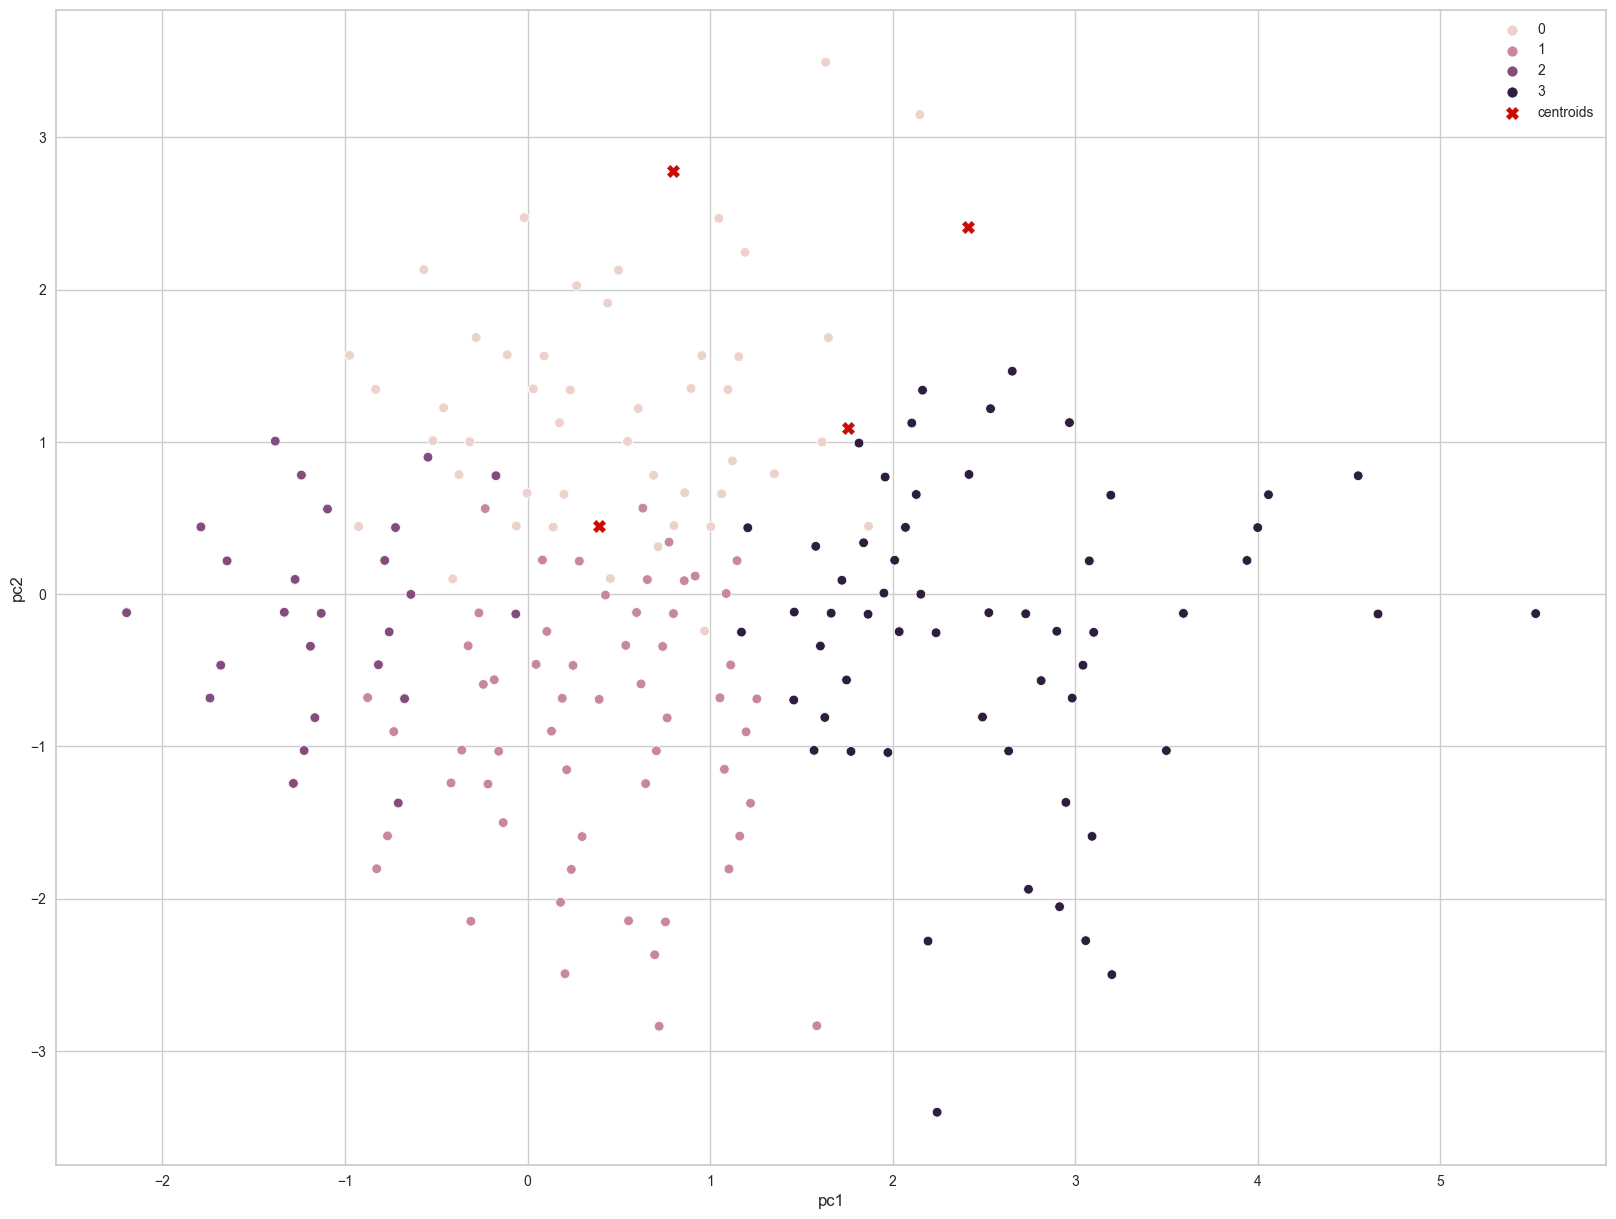

In [39]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

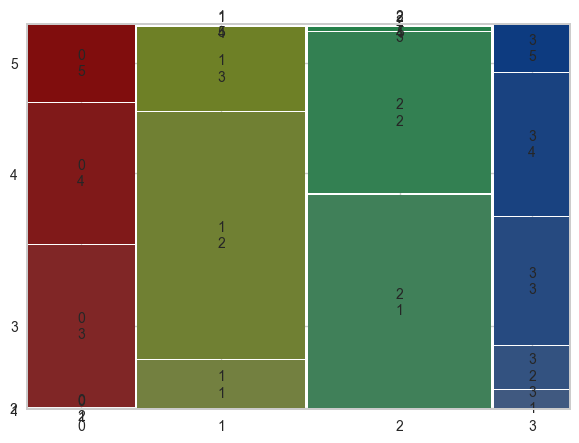

Health,1,2,3,4,5
cluster_num,,,,,
0,0,0,48,42,23
1,23,115,39,0,0
2,109,82,2,0,0
3,4,9,27,30,10


None

In [53]:
crosstab_gender = pd.crosstab(df['cluster_num'],df['Health'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

In [56]:
df['Financial'] = LabelEncoder().fit_transform(df['Financial'])
visit = df.groupby('cluster_num')['Financial'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,Financial
0,0,1.123894
1,1,1.039548
2,2,0.435233
3,3,2.287500


In [58]:
df['Recreational'] = LabelEncoder().fit_transform(df['Recreational'])
Like = df.groupby('cluster_num')['Recreational'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Recreational
0,0,0.796460
1,1,1.757062
2,2,0.393782
3,3,2.412500


In [59]:
df['Career'] = LabelEncoder().fit_transform(df['Career'])
Gender = df.groupby('cluster_num')['Career'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Career
0,0,0.707965
1,1,1.175141
2,2,0.378238
3,3,2.575000


In [60]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Career,Recreational,Financial
0,0,0.707965,0.796460,1.123894
1,1,1.175141,1.757062,1.039548
2,2,0.378238,0.393782,0.435233
3,3,2.575000,2.412500,2.287500


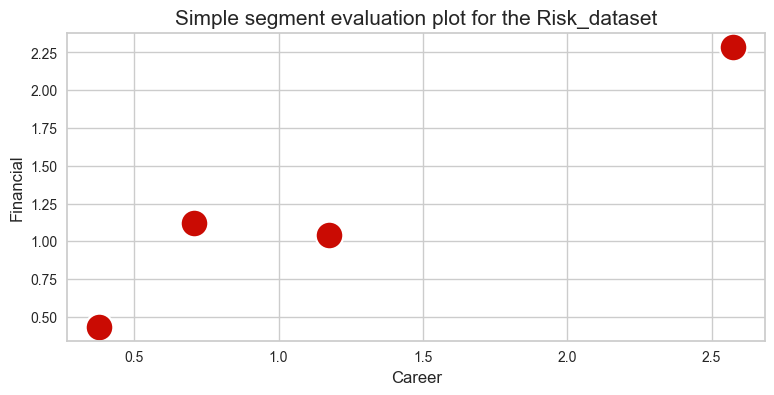

In [63]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "Career", y = "Financial",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the Risk_dataset", fontsize = 15) 
plt.xlabel("Career", fontsize = 12) 
plt.ylabel("Financial", fontsize = 12) 
plt.show()